In [154]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [155]:
def load_image(image_path):
    """
    Carrega a imagem e a converte para um array NumPy.
    """
    image = Image.open(image_path)
    return np.array(image)

In [156]:
def save_image(array, output_path):
    """
    Salva o array de imagem como arquivo.
    """
    image = Image.fromarray(array)
    image.save(output_path)

In [157]:
def rgb_to_grayscale(image_array):
    """
    Converte uma imagem colorida (RGB) para níveis de cinza.
    Utiliza a fórmula: Gray = 0.2989*R + 0.5870*G + 0.1140*B
    """
    if len(image_array.shape) != 3 or image_array.shape[2] != 3:
        raise ValueError("A entrada deve ser uma imagem RGB com 3 canais.")
    
    r, g, b = image_array[:,:,0], image_array[:,:,1], image_array[:,:,2]
    grayscale = (0.2989 * r + 0.5870 * g + 0.1140 * b).astype(np.uint8)
    return grayscale

In [158]:
def grayscale_to_binary(grayscale_array, threshold=int(grayscale_image.mean())):
    """
    Converte uma imagem em níveis de cinza para uma imagem binarizada (preto e branco).
    Pixels abaixo do limiar (threshold) são definidos como 0 (preto),
    e os acima ou iguais ao limiar são definidos como 255 (branco).
    """
    binary = np.where(grayscale_array >= threshold, 255, 0).astype(np.uint8)
    return binary

In [159]:
def show_images(original, grayscale, binary):
    """
    Exibe as imagens original, em tons de cinza e binarizada lado a lado.
    """
    plt.figure(figsize=(12, 6))

    # Exibir imagem original
    plt.subplot(1, 3, 1)
    plt.title("Original")
    plt.imshow(original)
    plt.axis("off")

    # Exibir imagem em tons de cinza
    plt.subplot(1, 3, 2)
    plt.title("Tons de Cinza")
    plt.imshow(grayscale, cmap="gray")
    plt.axis("off")

    # Exibir imagem binarizada
    plt.subplot(1, 3, 3)
    plt.title("Binarizada")
    plt.imshow(binary, cmap="gray")
    plt.axis("off")

    plt.tight_layout()
    plt.show()

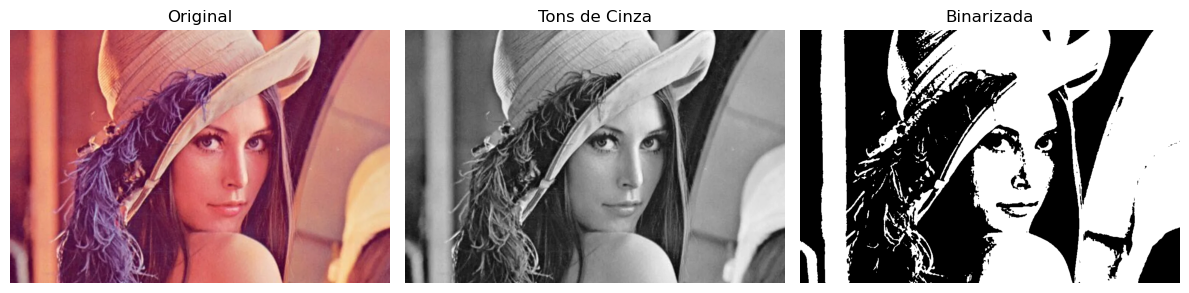

In [160]:
# Caminho da imagem de entrada
input_path = "/home/davicampos09/meusProjetos/bootcampML/Color-to-Gray/Lenna.webp"

# Executando as transformações
try:
    # Carregar imagem
    color_image = load_image(input_path)

    # Converter para níveis de cinza
    grayscale_image = rgb_to_grayscale(color_image)

    # Converter para binarizada
    binary_image = grayscale_to_binary(grayscale_image, threshold=128)

    # Mostrar as imagens
    show_images(color_image, grayscale_image, binary_image)

except Exception as e:
    print(f"Erro: {e}")